## **Linear and logistic regression**

In [75]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
import numpy as np
from typing import Union
from torch.utils.data import DataLoader, Dataset, TensorDataset

### **Linear Regression**

#### 1. Dataset

In [39]:
df = pd.read_csv('California_Houses.csv')
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [286]:
df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


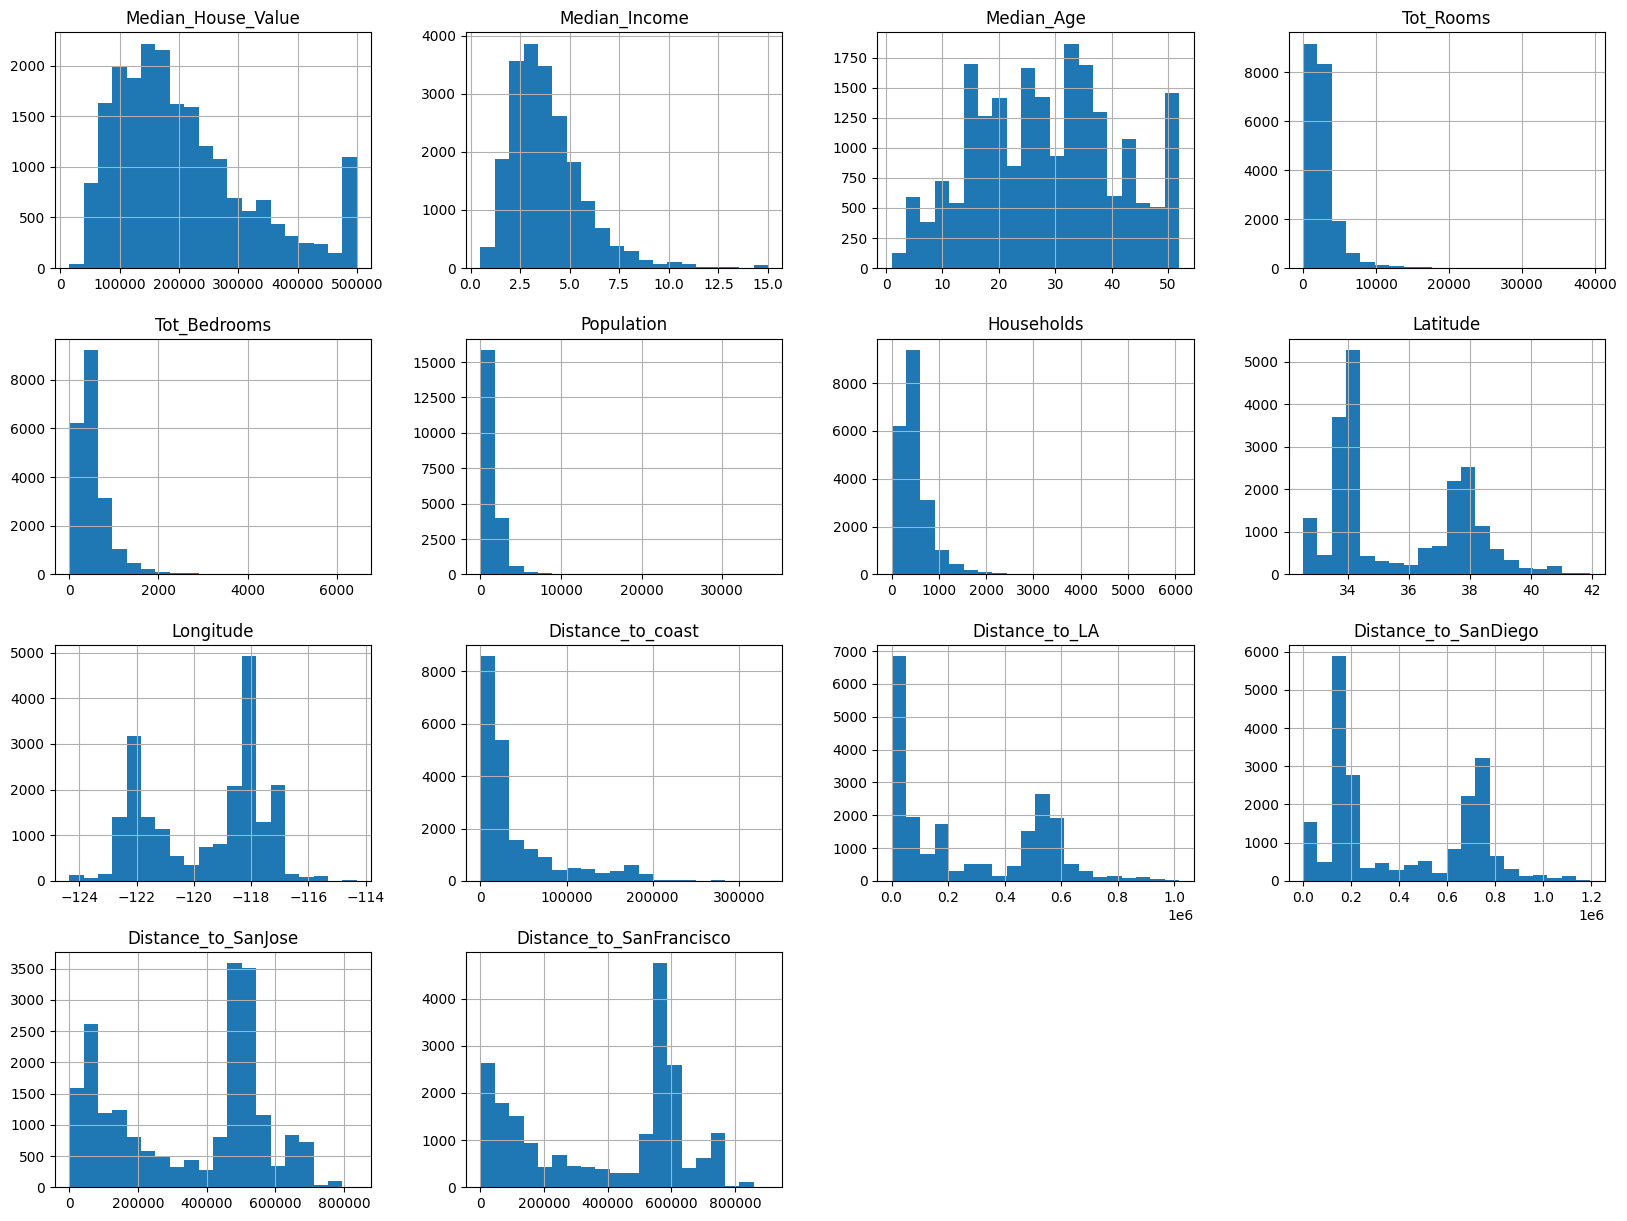

In [287]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

In [46]:
plt.style.use('default')


def plot_correlation_matrix(data: Union[pd.DataFrame, np.ndarray],
                            title: str = "Correlation Matrix",
                            cmap: str = 'coolwarm',
                            figsize: tuple = (14, 10)) -> None:
    if not isinstance(data, (pd.DataFrame, np.ndarray)):
        raise TypeError("Input data must be a pandas DataFrame or numpy array")

    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data)

    numeric_cols = data.select_dtypes(include=[np.number]).columns

    if len(numeric_cols) == 0:
        raise ValueError("No numerical columns found in the input data")

    corr_matrix = data[numeric_cols].corr().to_numpy()

    plt.figure(figsize=figsize)

    # Plot heatmap
    im = plt.imshow(corr_matrix, cmap=cmap, interpolation='nearest')
    plt.colorbar(im, label='Correlation Coefficient')

    plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha='right')
    plt.yticks(range(len(numeric_cols)), numeric_cols)

    for i in range(len(numeric_cols)):
        for j in range(len(numeric_cols)):
            plt.text(j, i, f'{corr_matrix[i, j]:.2f}',
                     ha='center', va='center',
                     color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black')
    plt.title(title)
    plt.tight_layout()

    plt.show()


### 2. Data Preprocessing

In [336]:
# Check null
df.isnull().any(axis=0)

Median_House_Value          False
Median_Income               False
Median_Age                  False
Tot_Rooms                   False
Tot_Bedrooms                False
Population                  False
Households                  False
Latitude                    False
Longitude                   False
Distance_to_coast           False
Distance_to_LA              False
Distance_to_SanDiego        False
Distance_to_SanJose         False
Distance_to_SanFrancisco    False
dtype: bool

In [47]:
# Check duplicated data
df = df.drop_duplicates()
df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


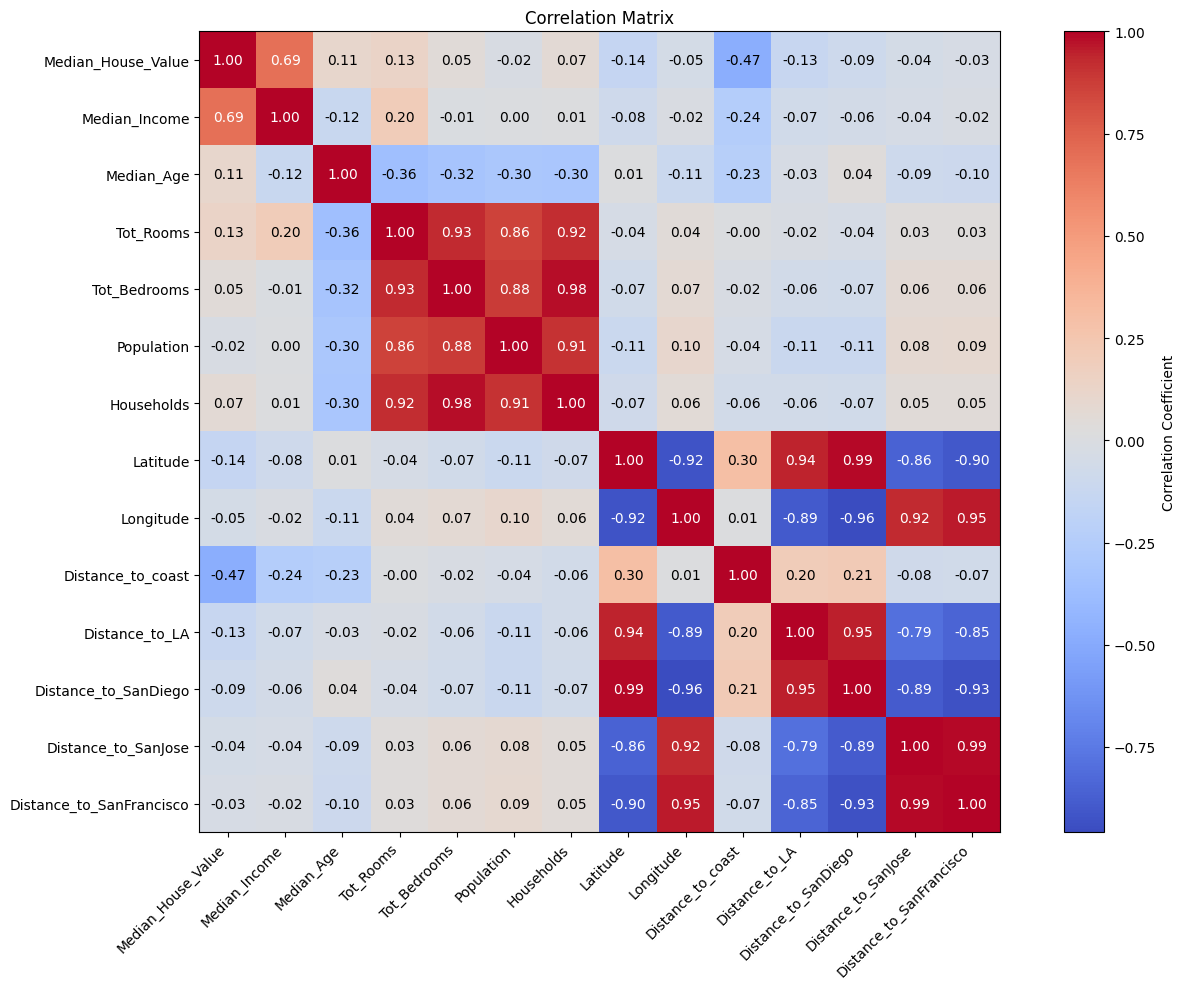

In [48]:
plot_correlation_matrix(df)

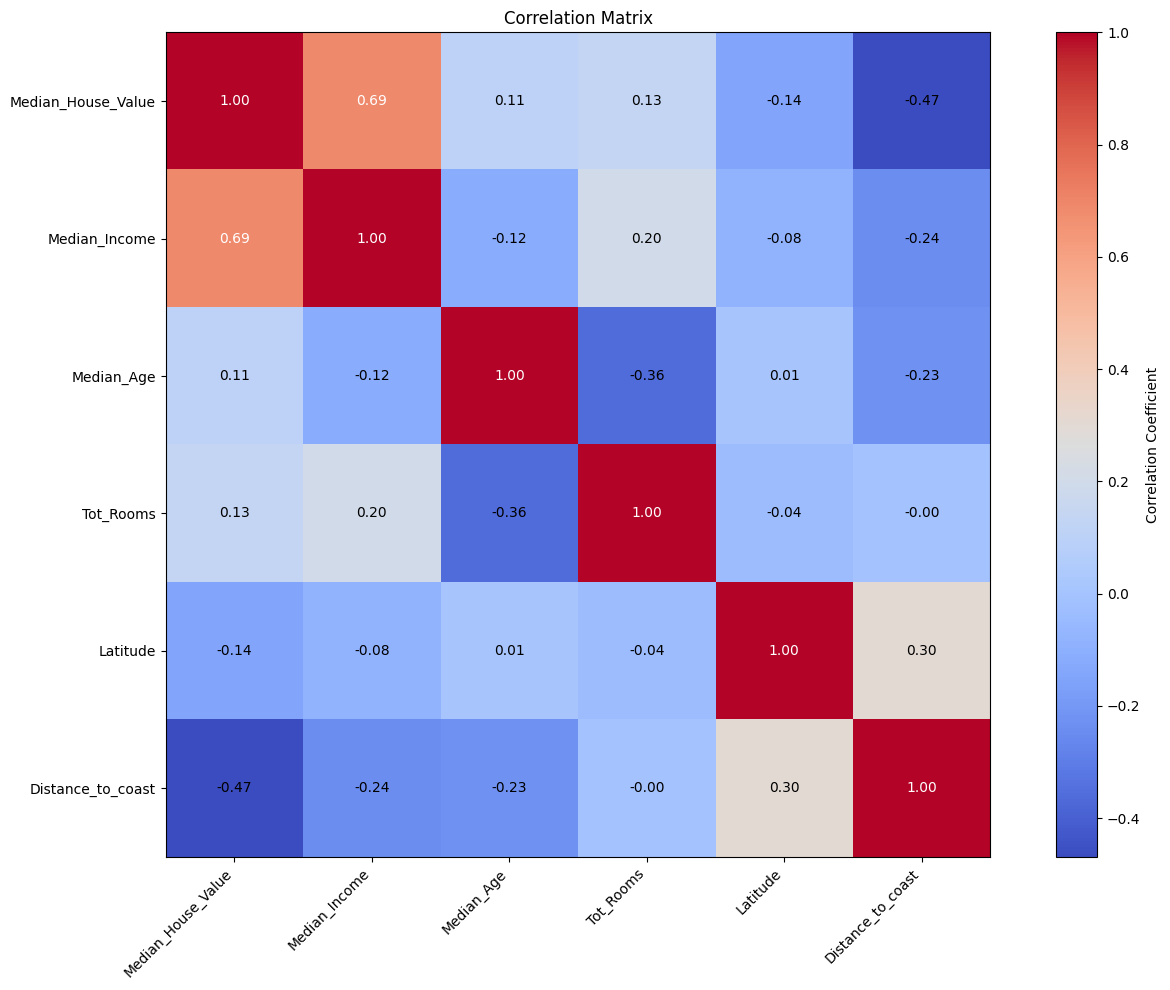

In [51]:
selected_cols = df.drop(columns=['Tot_Bedrooms', 'Population', 'Longitude',
                                 'Households', 'Distance_to_LA',
                                 'Distance_to_SanDiego', 'Distance_to_SanFrancisco',
                                 'Distance_to_SanJose'])

plot_correlation_matrix(selected_cols)

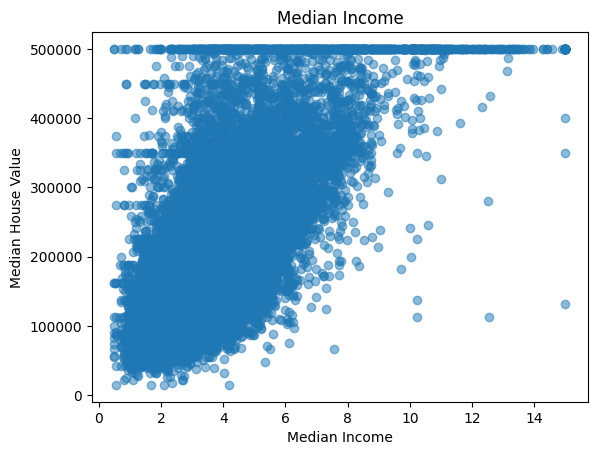

In [53]:
plt.scatter(selected_cols['Median_Income'], selected_cols['Median_House_Value'], alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median Income')
plt.show()

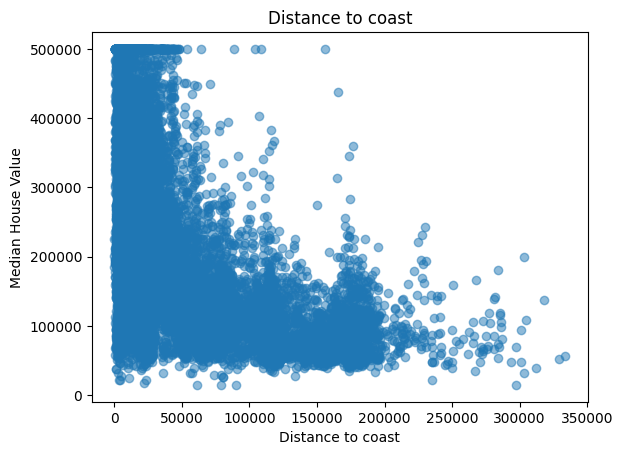

In [54]:
plt.scatter(selected_cols['Distance_to_coast'], selected_cols['Median_House_Value'], alpha=0.5)
plt.xlabel('Distance to coast')
plt.ylabel('Median House Value')
plt.title('Distance to coast')
plt.show()

In [55]:
selected_cols.head()
selected_cols.to_csv('data_preprocessing.csv', index=False)

#### Data normalization

In [56]:
def z_score(x):
    x = (x - np.mean(x)) / np.std(x)
    return x

In [57]:
# Nomalize each column
cols = ['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms', 'Latitude', 'Distance_to_coast']
selected_cols_normalized = selected_cols.copy()
for col in cols:
    selected_cols_normalized[col] = z_score(selected_cols[col])

cols_X = ['Median_Income', 'Median_Age', 'Tot_Rooms', 'Latitude', 'Distance_to_coast']

X = selected_cols_normalized[cols_X]
y = selected_cols_normalized['Median_House_Value']

X.to_csv('input.csv', index=False)
y.to_csv('output.csv', index=False)

### 3.  Models

In [58]:
def calculate_metrics(y, y_pred):
    # MSE
    mse = torch.mean((y - y_pred) ** 2)

    # RMSE
    rmse = torch.sqrt(mse)

    # MAE
    mae = torch.mean(torch.abs(y - y_pred))

    # R²
    ss_total = torch.sum((y - torch.mean(y)) ** 2)
    ss_residual = torch.sum((y - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)

    return {
        'MSE': mse.item(),
        'RMSE': rmse.item(),
        'MAE': mae.item(),
        'R2': r2.item()
    }

#### Linear Regression

In [62]:
class LinearRegression:

    def __init__(self, learning_rate: float = 0.01, num_iterations: int = 1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.train_metrics = []
        self.weights = None
        self.bias = None

    def fit(self, X: torch.Tensor, y: torch.Tensor) -> list:
        if not isinstance(X, torch.Tensor) or not isinstance(y, torch.Tensor):
            raise ValueError("X and y must be torch. Tensor objects")

        num_samples, num_features = X.shape
        self.weights = torch.randn((num_features, 1), dtype=torch.float32) * 0.01
        self.bias = torch.zeros(1, dtype=torch.float32)

        losses = []
        for epoch in range(self.num_iterations):
            y_pred = torch.matmul(X, self.weights) + self.bias

            loss = torch.mean((y_pred - y) ** 2)
            losses.append(loss.item())

            grad_weights = (2 / num_samples) * torch.matmul(X.T, (y_pred - y))
            grad_bias = (2 / num_samples) * torch.sum(y_pred - y)

            self.weights -= self.learning_rate * grad_weights
            self.bias -= self.learning_rate * grad_bias

            train_metrics = calculate_metrics(X, y)
            self.train_metrics.append(train_metrics)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: loss={loss:.6f}")

        return losses

    def predict(self, X: torch.Tensor) -> torch.Tensor:
        if self.weights is None or self.bias is None:
            raise ValueError("Model must be trained before making predictions")
        if not isinstance(X, torch.Tensor):
            raise ValueError("Input X must be a torch.Tensor")

        return torch.matmul(X, self.weights) + self.bias

### 4. Model T

In [66]:
X = pd.read_csv('input.csv').values
y = pd.read_csv('output.csv').values

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = LinearRegression(0.01, 1000)

losses = model.fit(X_train, y_train)

Epoch 0: loss=0.955586
Epoch 100: loss=0.427507
Epoch 200: loss=0.420337
Epoch 300: loss=0.420078
Epoch 400: loss=0.420063
Epoch 500: loss=0.420062
Epoch 600: loss=0.420062
Epoch 700: loss=0.420062
Epoch 800: loss=0.420062
Epoch 900: loss=0.420062


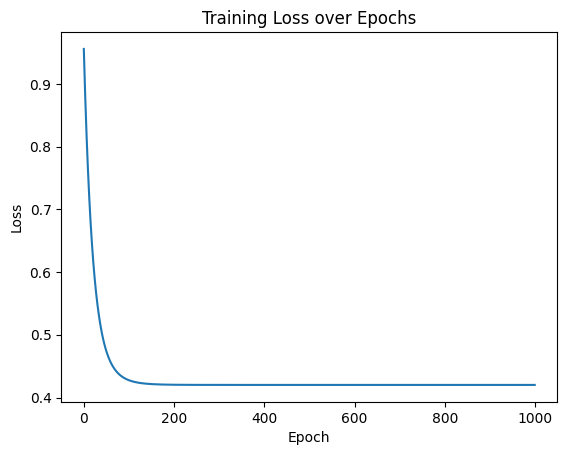

In [67]:
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### 5. Model e

In [69]:
train_predictions = model.predict(X_train)
train_metrics = calculate_metrics(y_train, train_predictions)

test_predictions = model.predict(X_test)
test_metrics = calculate_metrics(y_test, test_predictions)

print("Training Metrics:")
print(f"MSE: {train_metrics['MSE']:.6f}")
print(f"RMSE: {train_metrics['RMSE']:.6f}")
print(f"MAE: {train_metrics['MAE']:.6f}")
print(f"R²: {train_metrics['R2']:.6f}")

print("\nTest Metrics:")
print(f"MSE: {test_metrics['MSE']:.6f}")
print(f"RMSE: {test_metrics['RMSE']:.6f}")
print(f"MAE: {test_metrics['MAE']:.6f}")
print(f"R²: {test_metrics['R2']:.6f}")

Training Metrics:
MSE: 0.420062
RMSE: 0.648122
MAE: 0.477462
R²: 0.565965

Test Metrics:
MSE: 0.402665
RMSE: 0.634559
MAE: 0.460012
R²: 0.632045


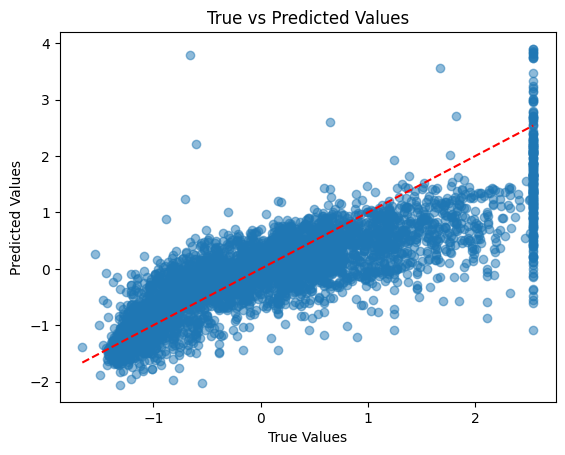

In [72]:
plt.scatter(y_test.detach().numpy(), test_predictions.detach().numpy(), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

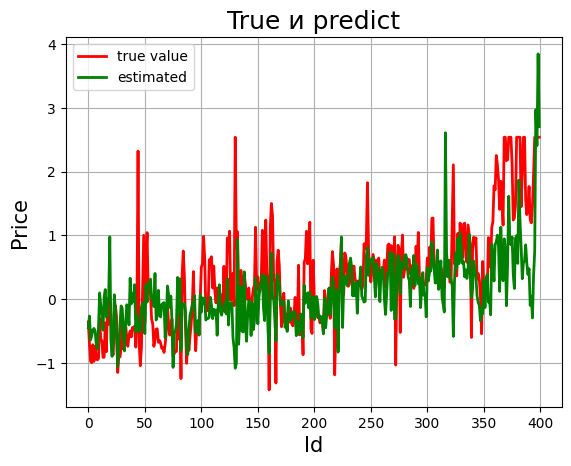

In [74]:
points_numbers = 400
t = np.arange(points_numbers)

plt.figure(facecolor='w')
plt.plot(t, y_test[:points_numbers], 'red', lw=2, label=u'true value')
plt.plot(t, test_predictions[:points_numbers], 'green', lw=2, label=u'estimated')
plt.legend(loc='best')
plt.title('True и predict', fontsize=18)
plt.xlabel('Id', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.grid()
plt.show()

### **Logistic Regression**

#### 1. Dataset

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
